In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import pandas_profiling
import sys,os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas.api.types as ptypes
from numpy.random import choice
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import random
from random import randrange
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import  matplotlib.pyplot as plt

from DataCorruption.DataCorruptor import DataCorruptor


from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')



import statsmodels.api as sm

E:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('./amit/data_with-error.csv')
print(df.columns)
df.head()
df.shape

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


(569, 32)

In [24]:
def load_data():
    df=pd.read_csv('./amit/data.csv')
    df['diagnosis'] =df['diagnosis'].apply(lambda x: 1 if x =="M" else 0)
    y = df['diagnosis']
    X = df.drop(['diagnosis','id'],axis=1)
    return X,y
X,y =load_data()
feature_cols = X.columns.to_list()


In [25]:
feature_stats = X.describe().T[['mean','std','max','min']]
df['diagnosis'] =df['diagnosis'].apply(lambda x: 1 if x =="M" else 0)
corr_matrix = df.corr()


In [4]:
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
ranking_names =map(lambda x: feature_cols[x],fit.ranking_)
print("Feature Ranking: %s" % list(ranking_names))

Num Features: 3
Selected Features: [False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False  True  True False False]
Feature Ranking: ['smoothness_mean', 'perimeter_se', 'smoothness_worst', 'concavity_worst', 'concave points_se', 'radius_se', 'area_mean', 'concavity_mean', 'smoothness_se', 'compactness_worst', 'texture_mean', 'concave points_mean', 'compactness_mean', 'compactness_se', 'symmetry_worst', 'area_se', 'symmetry_se', 'radius_worst', 'texture_worst', 'concave points_worst', 'concavity_se', 'symmetry_mean', 'fractal_dimension_mean', 'area_worst', 'perimeter_worst', 'perimeter_mean', 'texture_mean', 'texture_mean', 'fractal_dimension_se', 'texture_se']


In [5]:
mutual_info = np.array(mutual_info_classif(X, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=42))
mutual_info= pd.DataFrame(mutual_info,columns=["mutual_information"],index=feature_cols)
#mutual_info.sort_values(by='mutual_information',ascending=False)\
#        .plot(kind='bar',figsize=(16,9))

In [36]:
data_corruptor = DataCorruptor(X,feature_cols)
data_corruptor.get_dataset_with_corrupted_col('radius_mean')
data_corruptor.get_dataset_with_corrupted_col('smoothness_mean')
data_corruptor.get_dataset_with_corrupted_col('area_mean')
data_corruptor.get_dataset_with_corrupted_col('perimeter_se')
data_corruptor.get_dataset_with_corrupted_col('compactness_mean')
data_corruptor.get_dataset_with_corrupted_col('concavity_mean')
data_corruptor.get_dataset_with_corrupted_col('concave points_mean')
data_corruptor.get_dataset_with_corrupted_col('symmetry_mean')
data_corruptor.get_dataset_with_corrupted_col('texture_mean')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,NaN,NaN,122.80,NaN,NaN,NaN,NaN,NaN,NaN,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,NaN,NaN,132.90,NaN,NaN,NaN,NaN,NaN,NaN,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,NaN,NaN,130.00,NaN,NaN,NaN,NaN,NaN,NaN,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,NaN,NaN,77.58,NaN,NaN,NaN,NaN,NaN,NaN,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,NaN,NaN,135.10,NaN,NaN,NaN,NaN,NaN,NaN,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,NaN,NaN,142.00,NaN,NaN,NaN,NaN,NaN,NaN,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,NaN,NaN,131.20,NaN,NaN,NaN,NaN,NaN,NaN,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,NaN,NaN,108.30,NaN,NaN,NaN,NaN,NaN,NaN,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,NaN,NaN,140.10,NaN,NaN,NaN,NaN,NaN,NaN,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [59]:
# This function returns you a pippeline for specified features repesentation 
def get_pipeline(X,model=None):
    """Get a sklearn pipeline that is adjusted to the dataset X """ 
    numeric_features = X.select_dtypes(include="number").columns.to_list()
    categorical_features = X.select_dtypes(include="object").columns.to_list()

    if model is None:
        model =LogisticRegression()
    #TODO: Make this funtion parametrisable so it takes numeric/categorical transofmers as parameters 
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    return Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])


top_5_rfe =['area_mean', 'concavity_mean', 'area_se', 'concavity_worst',
       'symmetry_worst']

top_10_rfe = ['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'area_se', 'concavity_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst']

top_5_forward=['texture_mean', 'symmetry_mean', 'perimeter_worst', 'smoothness_worst', 'concave points_worst']

top_10_forward=['texture_mean', 'area_mean', 'fractal_dimension_mean', 'symmetry_se', 'texture_worst', 'perimeter_worst', 
                'smoothness_worst', 'compactness_worst', 'concavity_worst', 'fractal_dimension_worst']

top_5_chi2= ['perimeter_worst','perimeter_mean','area_mean','area_worst','area_se']

top_5_backward=['texture_mean', 'smoothness_mean', 'texture_worst', 'area_worst', 'concavity_worst']

top_5_error_ranking= ['texture_mean','radius_mean','perimeter_mean','area_mean','fractal_dimension_mean']
top_10_error_ranking= ['texture_mean','radius_mean','perimeter_mean','area_mean','fractal_dimension_mean',
                       'compactness_mean','smoothness_mean','concave points_mean','concavity_mean','symmetry_mean']


clf = get_pipeline(X)
clf_rfe = get_pipeline(X[top_5_rfe])
clf_rfe_top10 = get_pipeline(X[top_5_rfe])

clf_forward = get_pipeline(X[top_5_forward])
clf_forward_top10 = get_pipeline(X[top_10_forward])

clf_backward = get_pipeline(X[top_5_backward])
clf_chi2= get_pipeline(X[top_5_chi2])

clf_rfe_top5_error = get_pipeline(X[top_5_error_ranking])
clf_rfe_top10_error = get_pipeline(X[top_10_error_ranking])

In [60]:
X,y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


X_test_rfe, X_train_rfe =X_test[top_5_rfe],X_train[top_5_rfe]

X_test_forward, X_train_forward =X_test[top_5_forward],X_train[top_5_forward]
X_test_backward, X_train_backward =X_test[top_5_backward],X_train[top_5_backward]

X_test_chi2, X_train_chi2 =X_test[top_5_chi2],X_train[top_5_chi2]

X_test_5_error, X_train_5_error =X_test[top_5_error_ranking],X_train[top_5_error_ranking]
X_test_10_error, X_train_10_error =X_test[top_10_error_ranking],X_train[top_10_error_ranking]


In [8]:
##forward feature selection 
sfs_top5=SFS(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),
       k_features=5, 
        forward=True, 
        floating=False, 
        verbose=2,
        scoring='accuracy',
        cv=4, 
       n_jobs=-1
       ).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   25.0s finished

[2020-06-26 11:15:05] Features: 1/5 -- score: 0.8902099660463201[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   17.8s finished

[2020-06-26 11:15:23] Features: 2/5 -- score: 0.934091722187346[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   16.4s finished

[2020-06-26 11:15:39] Features: 3/5 -- score: 0.9583500401638956[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   16.2s finished

[2020-06-26 11:15:56] Features: 4/5 -- score: 0.9626787968381901[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:   15.9s finished

[2020

In [9]:
print('top5 feature by  forward feature selection:',sfs_top5.k_feature_names_)
print('forward section top 5 accuracy score:',sfs_top5.k_score_)

top5 feature by  forward feature selection: ('texture_mean', 'symmetry_mean', 'perimeter_worst', 'smoothness_worst', 'concave points_worst')
forward section top 5 accuracy score: 0.9626403205011373


In [10]:
##backward feature selection 
sfs_top_backward=SFS(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),
       k_features=5, 
        forward=False, 
        floating=False, 
        verbose=2,
        scoring='accuracy',
        cv=4, 
       n_jobs=-1
       ).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   23.5s finished

[2020-06-26 11:18:14] Features: 29/5 -- score: 0.9604861518937784[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   19.6s finished

[2020-06-26 11:18:34] Features: 28/5 -- score: 0.9605242907191025[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   18.4s finished

[2020-06-26 11:18:53] Features: 27/5 -- score: 0.9626212510884753[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   17.9s finished

[2020-06-26 11:19:11] Features: 26/5 -- score: 0.9692390123056777[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:   17.9s finished



In [11]:
print('top feature by  backward feature selection:',sfs_top_backward.k_feature_names_)

print('forward section top 5 accuracy score:',sfs_top_backward.k_score_)

top feature by  backward feature selection: ('texture_mean', 'smoothness_mean', 'texture_worst', 'area_worst', 'concavity_worst')
forward section top 5 accuracy score: 0.9758186346975557


### chi2

In [35]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score


In [38]:
print("fischer test score :")
fischer_score=chi2(X_train,y_train)
fischer_score

fischer test score :


(array([2.07872459e+02, 7.78089660e+01, 1.57007008e+03, 4.21057389e+04,
        1.09188976e-01, 4.37003125e+00, 1.53571325e+01, 8.29441981e+00,
        2.12791455e-01, 8.57194652e-06, 2.58466256e+01, 2.58566117e-03,
        1.88604498e+02, 6.51723317e+03, 3.06848128e-03, 5.13893246e-01,
        8.45194095e-01, 2.39531702e-01, 3.09156063e-06, 4.54086017e-03,
        3.82304850e+02, 1.41141975e+02, 2.83819854e+03, 8.73334871e+04,
        2.97443346e-01, 1.56731971e+01, 3.12432224e+01, 1.08460770e+01,
        1.10073925e+00, 1.85447919e-01]),
 array([3.99987007e-47, 1.13503772e-18, 0.00000000e+00, 0.00000000e+00,
        7.41069370e-01, 3.65763210e-02, 8.89843698e-05, 3.97670834e-03,
        6.44588233e-01, 9.97663966e-01, 3.69650356e-07, 9.59445529e-01,
        6.41128044e-43, 0.00000000e+00, 9.55824676e-01, 4.73458339e-01,
        3.57915470e-01, 6.24544549e-01, 9.98597094e-01, 9.46274490e-01,
        3.91889097e-85, 1.49794936e-32, 0.00000000e+00, 0.00000000e+00,
        5.85489670e-01

In [44]:
p_values=pd.Series(fischer_score[1],index=X_train.columns)
p_values.sort_values(ascending=True, inplace=True)
p_values


perimeter_worst            0.000000e+00
perimeter_mean             0.000000e+00
area_mean                  0.000000e+00
area_worst                 0.000000e+00
area_se                    0.000000e+00
radius_worst               3.918891e-85
radius_mean                3.999870e-47
perimeter_se               6.411280e-43
texture_worst              1.497949e-32
texture_mean               1.135038e-18
concavity_worst            2.276408e-08
radius_se                  3.696504e-07
compactness_worst          7.528350e-05
concavity_mean             8.898437e-05
concave points_worst       9.900528e-04
concave points_mean        3.976708e-03
compactness_mean           3.657632e-02
symmetry_worst             2.941039e-01
concavity_se               3.579155e-01
compactness_se             4.734583e-01
smoothness_worst           5.854897e-01
concave points_se          6.245445e-01
symmetry_mean              6.445882e-01
fractal_dimension_worst    6.667326e-01
smoothness_mean            7.410694e-01


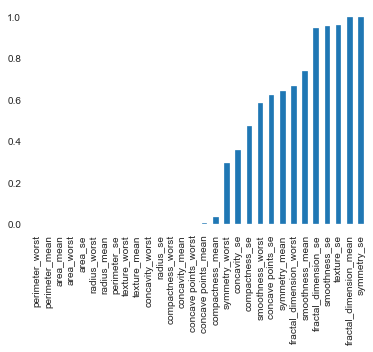

In [46]:
p_values.plot.bar();

In [57]:
fisher_top_5=X_train[['perimeter_worst','perimeter_mean','area_mean','area_worst','area_se']]
X_test_5=X_test[['perimeter_worst','perimeter_mean','area_mean','area_worst','area_se']]

In [55]:
def run_randomForest(X_train,X_test,y_train,y_test):
    clf_rf=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=1)
    clf_rf.fit(X_train,y_train)
    y_pred=clf_rf.predict(X_test)
    print("Accuracy:",accuracy_score(y_test,y_pred))

In [58]:
run_randomForest(fisher_top_5,X_test_5, y_train, y_test)

Accuracy: 0.9298245614035088


In [62]:
clf_rfe_top10_error.fit(X_train_10_error, y_train)

clf_rfe_top5_error.fit(X_train_5_error, y_train)
clf_rfe.fit(X_train_rfe, y_train)
clf_forward.fit(X_train_forward, y_train)
clf_backward.fit(X_train_backward, y_train)
clf_chi2.fit(X_train_chi2, y_train)


clf.fit(X_train, y_train)


clean_test_baseline= clf.score(X_test, y_test)
print("All featues model score: %.3f" % clean_test_baseline)

clean_test_rfe= clf_rfe.score(X_test_rfe, y_test)
print("RFE selected features  model score: %.3f" % clean_test_rfe)

clean_test_forward= clf_forward.score(X_test_forward, y_test)
print("forward selected features  model score: %.3f" % clean_test_forward)

clean_test_backward= clf_backward.score(X_test_backward, y_test)
print("backward selected features  model score: %.3f" % clean_test_backward)

clean_test_chi2= clf_chi2.score(X_test_chi2, y_test)
print("chi2 selected features  model score: %.3f" % clean_test_chi2)

clean_test_top5_error= clf_rfe_top5_error.score(X_test_5_error, y_test)
print("Top 5 Error exepriemnt featues model score: %.3f" % clean_test_baseline)

clean_test_top10_error= clf_rfe_top10_error.score(X_test_10_error, y_test)
print("TOp 10 Error exepriemnt featues model score: %.3f" % clean_test_top10_error)

All featues model score: 0.982
RFE selected features  model score: 0.912
forward selected features  model score: 0.965
backward selected features  model score: 0.956
chi2 selected features  model score: 0.904
Top 5 Error exepriemnt featues model score: 0.982
TOp 10 Error exepriemnt featues model score: 0.947


In [63]:
data_corruptor = DataCorruptor(X_test,feature_cols,feature_stats)
res_= []

print('Feature Ranking Error')
for idx,column in enumerate(feature_cols):
    corrupted_score = clf.score(data_corruptor.get_dataset_with_corrupted_col(column), y_test)
    loss = corrupted_score - clean_test_baseline
    res_.append([column,corrupted_score,loss])
    print("model score: %.3f" % corrupted_score)

Feature Ranking Error
model score: 0.982
model score: 0.982
model score: 0.991
model score: 0.982
model score: 0.982
model score: 0.974
model score: 0.965
model score: 0.965
model score: 0.974
model score: 0.956
model score: 0.956
model score: 0.965
model score: 0.965
model score: 0.956
model score: 0.956
model score: 0.947
model score: 0.939
model score: 0.939
model score: 0.939
model score: 0.939
model score: 0.930
model score: 0.912
model score: 0.886
model score: 0.807
model score: 0.798
model score: 0.781
model score: 0.711
model score: 0.640
model score: 0.632
model score: 0.632


In [64]:
def do_experiment(clf,X_test,y_test,feature_cols):
    
    data_corruptor = DataCorruptor(X_test,feature_cols)
    total_cells = X_test.shape[0] * X_test.shape[1]
    res= []
    for n in range(total_cells):
            #print(y_test)
            corrupted_score = clf.score(data_corruptor.get_dataset_with_corrupted_cell(), y_test)
            res.append([(n/total_cells),corrupted_score])
    df = pd.DataFrame(res,columns=['%Corrupted','Score'])
    
    print('Area under the curve {}'.format(np.trapz(df['Score'],df['%Corrupted'])))
    return df


In [65]:
print("15% corruption report: ")
experiment_df = do_experiment(clf,X_test,y_test,feature_cols)
expeirment_df_rfe = do_experiment(clf_rfe,X_test_rfe,y_test,top_5_rfe)
expeirment_df_forward = do_experiment(clf_forward,X_test_forward,y_test,top_5_forward)
expeirment_df_backward = do_experiment(clf_backward,X_test_backward,y_test,top_5_backward)
expeirment_df_chi2 = do_experiment(clf_chi2,X_test_chi2,y_test,top_5_chi2)
experiment_df_5_error = do_experiment(clf_rfe_top5_error,X_test_5_error,y_test,top_5_error_ranking)
experiment_df_10_error = do_experiment(clf_rfe_top10_error,X_test_10_error,y_test,top_10_error_ranking)

15% corruption report: 
Area under the curve 0.8757309941520468
Area under the curve 0.8214989227454601
Area under the curve 0.81372730070791
Area under the curve 0.8029162819329024
Area under the curve 0.7836949830717143
Area under the curve 0.7914589104339796
Area under the curve 0.8268236380424746


95% report:
Area under the curve 0.8436865189289012
Area under the curve 0.8174515235457064
Area under the curve 0.8390273930440135
Area under the curve 0.8060864881502001
Area under the curve 0.7725992613111727
Area under the curve 0.810737919359803

In [21]:
class AccErrorSelection:
    def __init__(self,data,target,model=None):
        self.data = data.copy()
        self.target = target
        self.model = model
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(data,target, test_size=0.20)
        self.clean_test_baseline_score = self.measure_model_performance(self.X_train, self.X_test, self.y_train, self.y_test) #TODO: 
        
        self.error_test_baseline_score = self.measure_error_auc(self.get_pipeline(self.X_train).fit(self.X_train,self.y_train),
                                                                self.X_test,
                                                                self.y_test,
                                                                data.columns.tolist())
        
        self.best_acc_features = [] # List of features that has perfomed best wrt to accuracy of the model (or OLS)
        self.best_error_features = [] # List of features that hes perfomed best wrt to error score

    def measure_error_auc(self,clf,X_test,y_test,feature_cols):
    
        data_corruptor = DataCorruptor(X_test,feature_cols)
        total_cells = X_test.shape[0] * X_test.shape[1]
        res= []
        for n in range(total_cells):
                corrupted_score = clf.score(data_corruptor.get_dataset_with_corrupted_cell(), y_test)
                res.append([(n/total_cells),corrupted_score])
        df = pd.DataFrame(res,columns=['%Corrupted','Score'])

        #print('Area under the curve {}'.format(np.trapz(df['Score'],df['%Corrupted'])))
        return np.trapz(df['Score'],df['%Corrupted'])

        
    def measure_model_performance(self,X_train,X_test,y_train,y_test):
        """ This helping function is used to retrive the perfomnace of the the model for a given feature representation. 
            It does retrive the pipeline, fit it with train data and evaluate performance    
        """
        pipeline = self.get_pipeline(X_train)    
        pipeline.fit(X_train,y_train)
        return pipeline.score(X_test,y_test)

    def get_feature_representations(feature_list_to_trim, feature_to_remove):
        
        pass
        
        
    def forward_selection(self,significance_level=0.05):
        initial_features = self.data.columns.tolist()
        best_features = []
        while (len(initial_features)>0):
            remaining_features = list(set(initial_features)-set(best_features))
            new_pval = pd.Series(index=remaining_features)
            for new_column in remaining_features:
                features_with_constant = sm.add_constant(self.data[best_features+[new_column]])
                model = sm.OLS(self.target, features_with_constant).fit()
                new_pval[new_column] = model.pvalues[new_column]
            min_p_value = new_pval.min()
            if(min_p_value<significance_level):
                best_features.append(new_pval.idxmin())
            else:
                break
        return best_features

        
    
    
    def backward_elimination(self,full_feature_list, significance_level = 0.05):
        features = full_feature_list 
        results_dict = {}
        score = self.measure_error_auc(self.get_pipeline(self.X_train[features]).fit(self.X_train[features],self.y_train),self.X_test[features],self.y_test,features)

        for feature in full_feature_list:            
                tmp_features=features
                tmp_features.remove(feature)
                auc = self.measure_error_auc(self.get_pipeline(self.X_train[tmp_features]).fit(self.X_train[tmp_features],self.y_train),self.X_test[tmp_features],self.y_test,tmp_features)
                results_dict[repr(tmp_features)] = auc
        #        features.remove(excluded_feature)

        return features

    def prepare_error_ranking(self,corruption_degree=0.95):
        """ This function creates the initial ranking for of the features.
            The ranking is created by corrupting every coolumn on by one and evaluation the perfomance drop for each corruption. 
            Corruption is parametrisable.
            corruption_degree type: int 
        """
        feature_stats = self.data.describe().T[['mean', 'std', 'max', 'min']]
        feature_cols = self.data.columns.to_list()
        data_corruptor = DataCorruptor(self.X_test,feature_cols,feature_stats)
        pipeline_model = self.get_pipeline(self.X_train,model=self.model)
        pipeline_model.fit(self.X_train,self.y_train)
        res_= []
        print('Feature Ranking Error')
        for idx,column in enumerate(feature_cols):
            corrupted_score = pipeline_model.score(data_corruptor.get_dataset_with_corrupted_col(column), self.y_test)
            loss = corrupted_score - self.clean_test_baseline_score
            res_.append([column,corrupted_score,loss])
            print("model score: %.3f" % corrupted_score)
        return res_
        